In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Start here if...
You have some experience with R or Python and machine learning basics, but you’re new to computer vision. This competition is the perfect introduction to techniques like neural networks using a classic dataset including pre-extracted features.

Competition Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

Practice Skills
Computer vision fundamentals including simple neural networks

Classification methods such as SVM and K-nearest neighbors

Acknowledgements 
More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.



In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
clf=RandomForestClassifier(n_estimators=100)

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
xtrain=train.drop('label',axis=1)
ytrain=train.label

In [8]:
a=train.iloc[3,1:].values

In [9]:
b=a.reshape(28,28).astype('uint8')

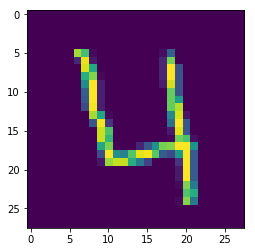

In [10]:
plt.imshow(b)

In [11]:
clf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
v=clf.predict(test)

In [13]:
test['Label']=v

In [14]:
v.shape

(28000,)

In [15]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [16]:
ImageId=np.arange(1,28001).tolist()
Label=test['Label'].values.tolist()

In [17]:
d={'ImageId':ImageId,'Label':Label}

In [18]:
solution=pd.DataFrame(d)

In [19]:
solution.to_csv('imagerecog.csv',index=False)

- Submit the generated csv file to kaggle and check for accuracy.

In [20]:
import pickle

In [42]:
clf_pkl=open("rf.pkl","wb")

In [43]:
pickle.dump(clf,clf_pkl)

In [44]:
clf_pkl.close()

In [54]:
clf_load=open("rf.pkl","rb")

In [58]:
clf_rf=pickle.load(clf_load)

In [59]:
clf_rf.n_features_

784